# DS106-02-08-ML - Lesson 2 Practice Hands-On
---

## Import Packages

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

---
## Load in Data

In [2]:
# load data -> seaborn dataset `mpg`
Mpg = sns.load_dataset('mpg')

---
# Goal: determine how cars are grouped together.

---
## Data Wrangling
- The `KMeans()` function cannot handle cells that are strings
- If you want to use data in a string variable, you could instead re-code that variable numerically; 
- If you don't need the string variable, use `drop()`.

In [3]:
# look at dataset
Mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# list the datatypes of all variables
Mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

### Drop string variable columns (dytpe: object)

In [5]:
# KMeans() cannot use string values
# Create a dataframe without column(s) with string variables
# (columns with dtype: objects)
MpgTrimmed = Mpg.drop(['origin', 'name'], axis=1)
MpgTrimmed.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


### Drop missing values

In [6]:
MpgTrimmed.dropna(inplace=True)

### Convert `floats` to `integers`

In [7]:
# list the datatypes of all variables
MpgTrimmed.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
dtype: object

In [8]:
# convert floats to integers
MpgTrimmed.mpg = MpgTrimmed.mpg.astype(int)
MpgTrimmed.displacement = MpgTrimmed.displacement.astype(int)
MpgTrimmed.horsepower = MpgTrimmed.horsepower.astype(int)
MpgTrimmed.acceleration = MpgTrimmed.acceleration.astype(int)

In [9]:
# confirm conversion
MpgTrimmed.dtypes

mpg             int64
cylinders       int64
displacement    int64
horsepower      int64
weight          int64
acceleration    int64
model_year      int64
dtype: object

---
## Perform k-Means Clustering
Use the function `KMeans()` to specify the number of clusters, and then fit it using `fit()`.

---
### Testing 2 clusters

In [10]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(MpgTrimmed)

KMeans(n_clusters=2)

**Utilizing k-Means:** Find `kmeans` and add back to the dataframe.

In [11]:
MpgTrimmed['Group'] = kmeans.labels_

In [12]:
# view results
MpgTrimmed.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Group
0,18,8,307,130,3504,12,70,1
1,15,8,350,165,3693,11,70,1
2,18,8,318,150,3436,11,70,1
3,16,8,304,150,3433,12,70,1
4,17,8,302,140,3449,10,70,1


In [13]:
# condensing the results
MpgTrimmed.groupby('Group').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
Group,,,,,,,
0,27.889831,4.305085,123.521186,82.593220,2381.381356,15.813559,76.783898
1,16.314103,7.237179,301.653846,137.564103,3879.532051,14.237179,74.762821


#### _Conclusion for 2 clusters:_ clear division on each variable.

---
### Testing 2 clusters

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(MpgTrimmed)

KMeans(n_clusters=3)

In [15]:
MpgTrimmed['Group'] = kmeans.labels_

In [16]:
MpgTrimmed.groupby('Group').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
Group,,,,,,,
0,20.590164,5.819672,212.614754,105.401639,3162.581967,15.516393,76.352459
1,14.533333,7.866667,344.144444,157.811111,4236.322222,13.200000,74.011111
2,29.483333,4.038889,107.205556,77.166667,2222.827778,15.955556,76.711111


#### _Conclusion for 3 clusters:_ clear division in groups -> slow, middle, fast.

---
### Testing 2 clusters

In [17]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(MpgTrimmed)

KMeans(n_clusters=4)

In [18]:
MpgTrimmed['Group'] = kmeans.labels_

In [19]:
MpgTrimmed.groupby('Group').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
Group,,,,,,,
0,24.418367,4.704082,154.346939,94.295918,2746.438776,15.326531,77.112245
1,13.898551,8.000000,356.536232,165.130435,4366.594203,12.782609,73.608696
2,30.566176,3.977941,98.125000,72.948529,2107.705882,16.205882,76.625000
3,18.179775,6.640449,259.966292,116.808989,3484.483146,15.337079,75.584270


#### _Conclusion for 4 clusters:_ losing clear division; seems 3 clusters is best.

---
### Plotting 3 Clusters

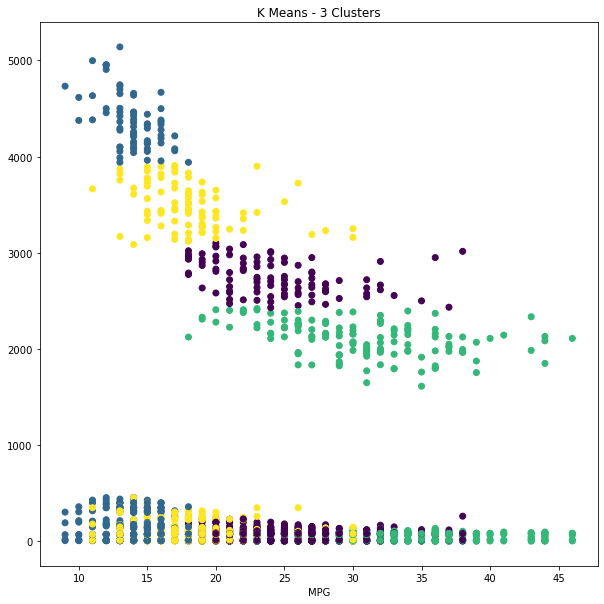

In [20]:
plt.figure(figsize=(10,10))
plt.title('K Means - 3 Clusters')
plt.scatter(MpgTrimmed['mpg'], MpgTrimmed['cylinders'], c=kmeans.labels_)
plt.scatter(MpgTrimmed['mpg'], MpgTrimmed['displacement'], c=kmeans.labels_)
plt.scatter(MpgTrimmed['mpg'], MpgTrimmed['horsepower'], c=kmeans.labels_)
plt.scatter(MpgTrimmed['mpg'], MpgTrimmed['weight'], c=kmeans.labels_)
plt.scatter(MpgTrimmed['mpg'], MpgTrimmed['acceleration'], c=kmeans.labels_)
plt.scatter(MpgTrimmed['mpg'], MpgTrimmed['model_year'], c=kmeans.labels_)